# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция в рамках проекта deeplay[lab] про линейные модели А.Н.Шевляков](https://youtu.be/n9I5BBBZmRU)
- [Учебник ML от ШАД — линейные модели](https://ml-handbook.ru/chapters/linear_models/intro)
- Заметки из курса [Машинное обучение на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
  - [лекция 1](99-extra__ml-course-hse__lecture02-linregr.pdf)
  - [лекция 2](99-extra__ml-course-hse__lecture03-linregr.pdf)
  - [лекция 3](99-extra__ml-course-hse__lecture04-linregr.pdf)
- [Статья про лин.рег. от ODS на habrahabr](https://habr.com/ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

Он лежит в `./data/house_prices.csv.gz`

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик.

In [12]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [43]:
df = pd.read_csv('./data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
assert df.shape == (1460, 80)

In [15]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание:
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

Kurtosis: 6.51


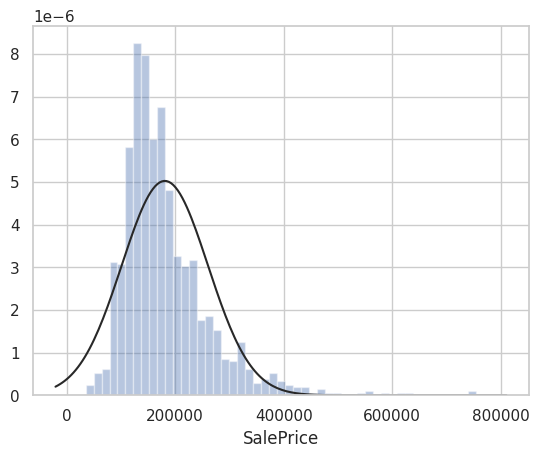

In [ ]:
sns.distplot(df['SalePrice'], fit=stats.norm, kde=False)
kurtosis = stats.kurtosis(df['SalePrice'])
kurtosis_value = stats.kurtosis(df['SalePrice'])
print(f'Kurtosis: {kurtosis_value:.2f}')

Учитывая что лабы старые скорее всего должен использоваться distplot

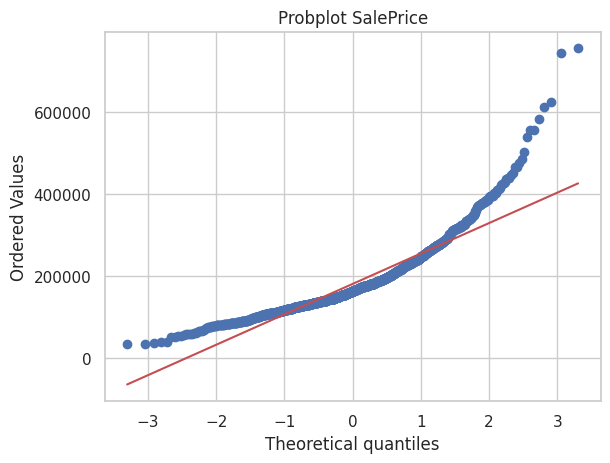

In [ ]:
stats.probplot(df['SalePrice'], dist="norm", fit=stats.norm, plot=plt)
plt.title('Probplot SalePrice')
plt.show()

Распределение далеко от нормального в хвостах наиболее сильно это выражено в правой части

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

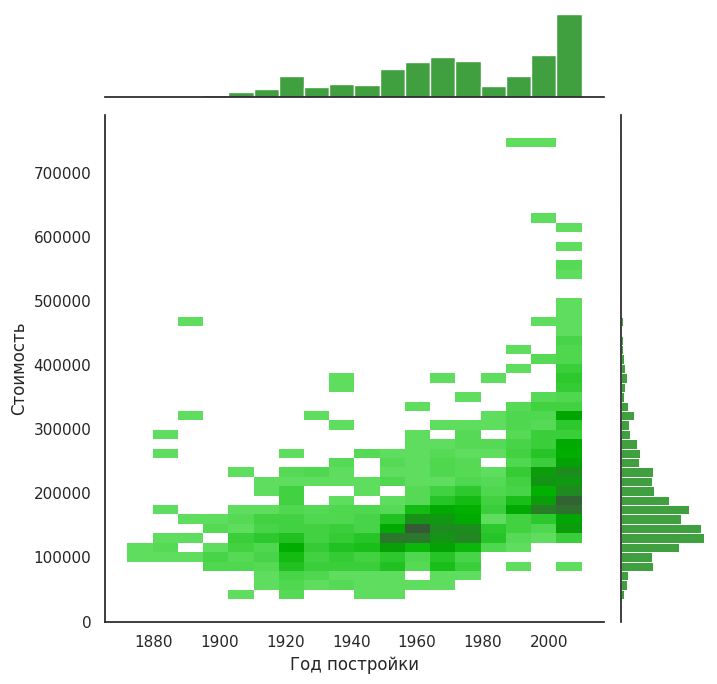

In [ ]:
g = sns.jointplot(
    x="YearBuilt",
    y="SalePrice",
    data=df,
    kind='hist',
    height=7,
    ratio=5,
    color='Green'
)
g.set_axis_labels("Год постройки","Стоимость")
plt.show()

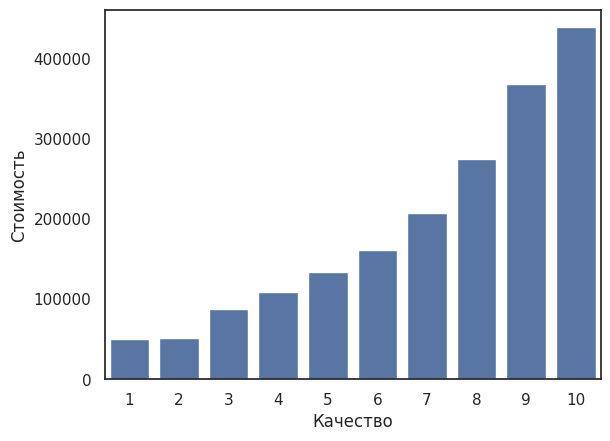

In [ ]:
ax = sns.barplot(x="OverallQual", y="SalePrice", data=df, errorbar=None)
ax.set(ylabel='Стоимость', xlabel='Качество')
plt.show()

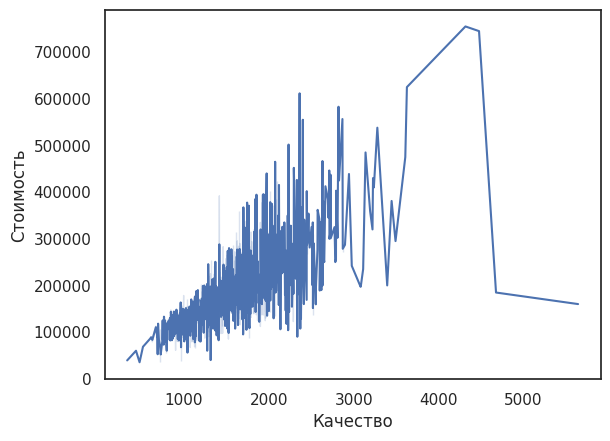

In [ ]:
ax = sns.lineplot(x="GrLivArea", y="SalePrice", data=df)
ax.set(ylabel='Стоимость', xlabel='Качество')
plt.show()

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

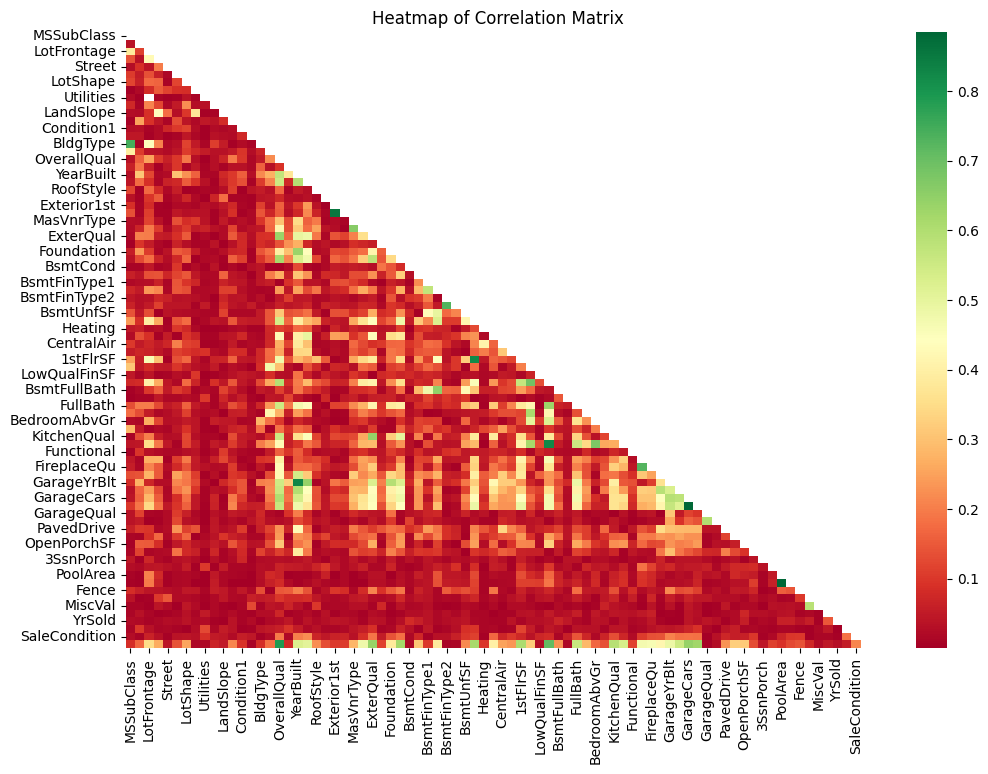

In [45]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# object to nums
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col.astype(str)))


corr_matrix = np.abs( df.corr())

#heatmap
plt.figure(figsize=(12, 8))
mask=np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlation Matrix')

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной.

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции.
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

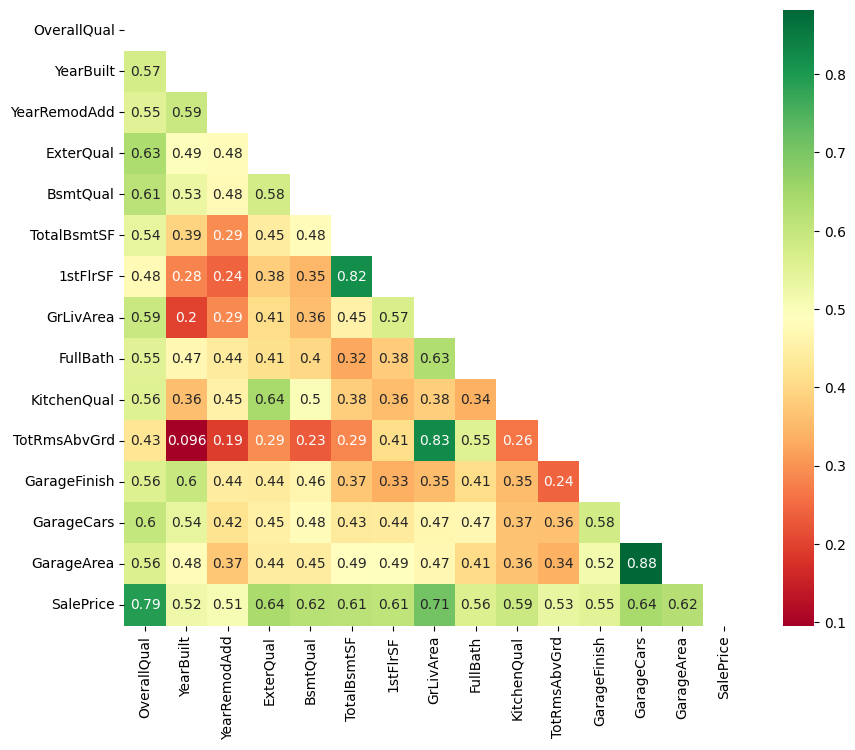

In [ ]:
high_corr_features = corr_matrix.index[corr_matrix["SalePrice"] > 0.5]

# heatmap
plt.figure(figsize=(10, 8))
high_corr = np.abs(df[high_corr_features].corr())
mask=np.triu(high_corr)
sns.heatmap(high_corr,annot=True,cmap='RdYlGn',mask=mask)
plt.show()

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [46]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df)) * 100

print("Пропущенные данные (количество и процент):")
print(missing_data)
print(missing_data_percentage )
#delete
df = df.drop(columns=missing_data_percentage[missing_data_percentage>10].index)

Пропущенные данные (количество и процент):
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64


In [47]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[categorical_columns] = df[categorical_columns].fillna('unknow')
numeric_cols = df.select_dtypes(include='float64')
df[numeric_cols.columns] = df[numeric_cols.columns].fillna(numeric_cols.mean())
#test
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

Series([], dtype: int64)


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [39]:
df = pd.get_dummies(df)
print(f"Количество признаков после кодирования: {df.shape[1]}")
df.columns

Количество признаков после кодирования: 276


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=276)

In [40]:
X = df.drop(['SalePrice'], axis=1)
y = df["SalePrice"]

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [20]:
lr = LinearRegression()
lr.fit(X,y)
coeff = lr.coef_
for coef, col in sorted(zip(lr.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print(f"{np.round(coef, 4)} \t {col}")

0.1247 	 MiscVal
0.7624 	 LotArea
-1.9222 	 BsmtUnfSF
2.5271 	 OpenPorchSF
4.4071 	 EnclosedPorch
7.0234 	 BsmtFinSF2
13.405 	 WoodDeckSF
13.4252 	 MasVnrArea
15.368 	 1stFlrSF
17.4161 	 BsmtFinSF1
18.3841 	 GarageArea
-19.5341 	 LowQualFinSF
-19.7932 	 MSSubClass
22.5174 	 TotalBsmtSF
28.5857 	 ScreenPorch
-30.1813 	 GarageYrBlt
31.1503 	 GrLivArea
-31.1721 	 HeatingQC_TA
31.1721 	 CentralAir_N
31.4132 	 3SsnPorch
35.3166 	 2ndFlrSF
84.6259 	 Functional_Min2
85.1138 	 PoolArea
100.6289 	 YearRemodAdd
-129.4264 	 GarageFinish_RFn
-135.8611 	 Exterior2nd_AsphShn
-232.5904 	 GarageType_unknow
316.0467 	 YearBuilt
-321.4119 	 GarageType_Basment
-328.279 	 YrSold
399.5114 	 Exterior2nd_Wd Sdng
-399.8964 	 Heating_GasW
421.5442 	 LandSlope_Sev
-428.9453 	 LotShape_Reg
-446.9377 	 MoSold
580.5998 	 GarageCond_unknow
603.6682 	 BsmtFullBath
620.3316 	 BsmtFinType1_Rec
663.7442 	 PavedDrive_P
765.1362 	 GarageType_2Types
-836.5262 	 BsmtFinType1_ALQ
850.2726 	 HalfBath
865.7633 	 HeatingQC_Ex


In [21]:
mse_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -mse_scores.mean()
print(f"Средняя ошибка предсказания (MSE) на 5 фолдах: {mean_mse:.0f}")

Средняя ошибка предсказания (MSE) на 5 фолдах: 35872771698370656


Учитывая что RoofStyle_Shed по сути совпали такое больше значение mse вызвано тем что не используется scaler и тем как мы работаем с данными


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [22]:
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_

    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X, y)
    coefs_ridge[i, :] = ridge.coef_

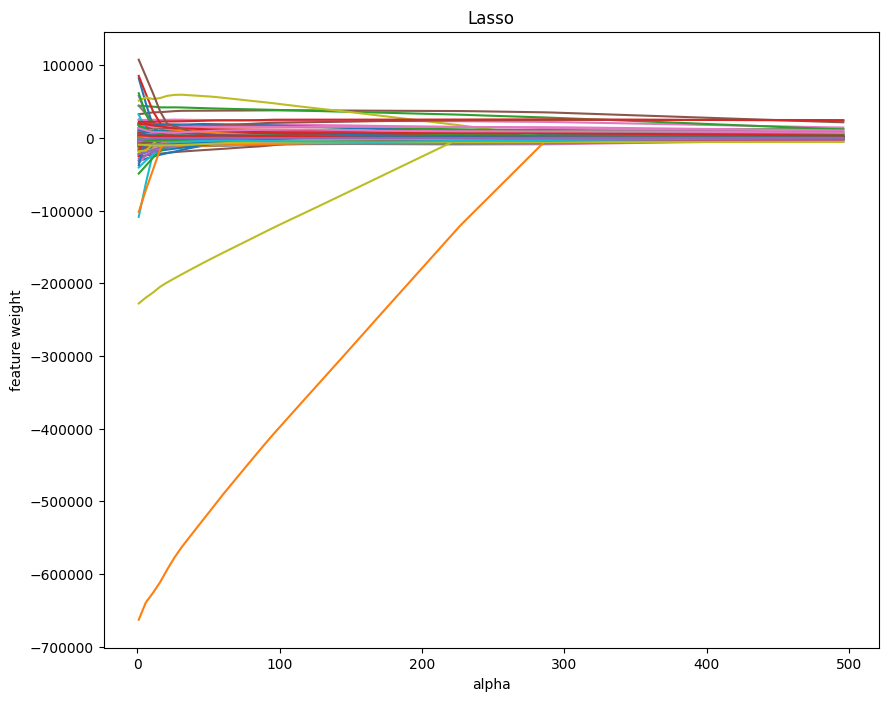

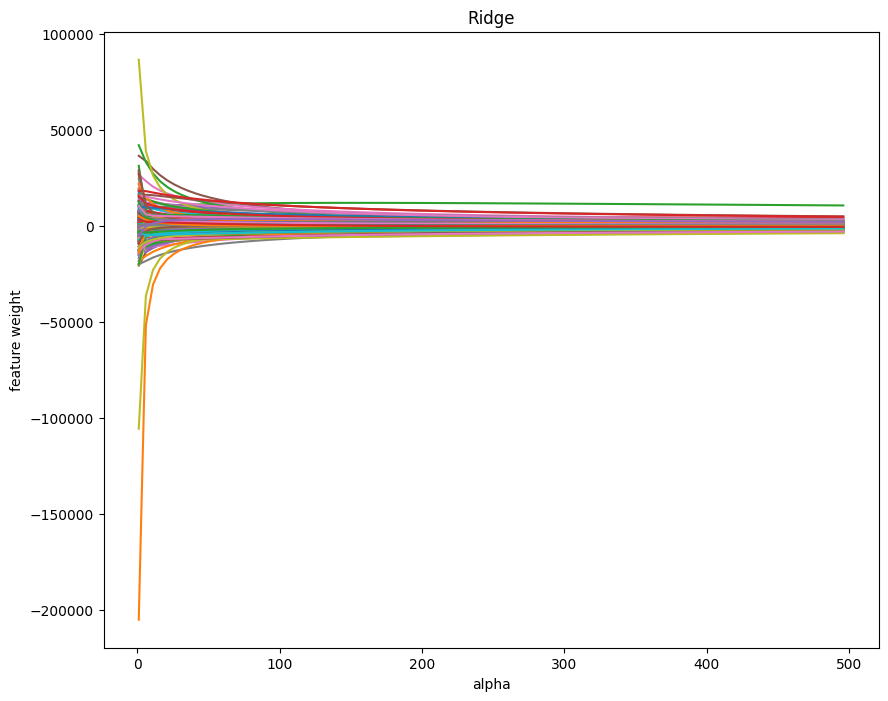

In [23]:
# Lasso
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature)
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")
plt.legend=False
plt.show()

# Ridge
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature)
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")
plt.legend=False
plt.show()

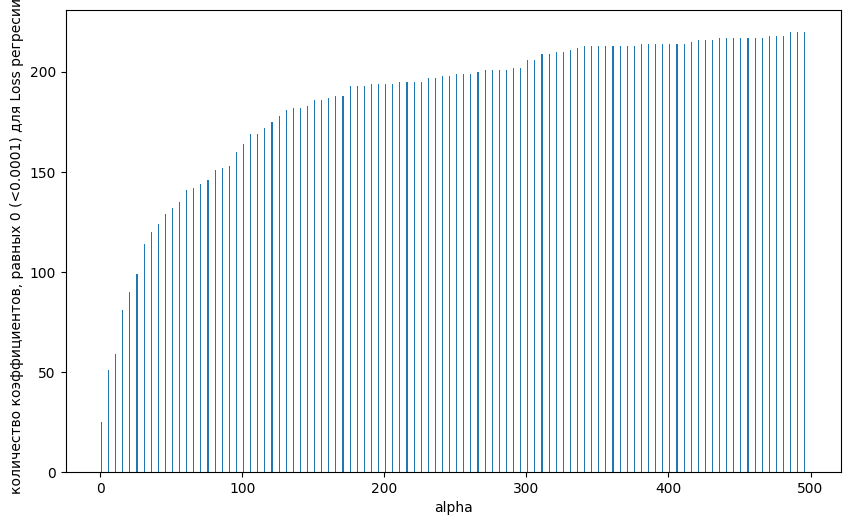

In [24]:
lasso_zero_coefs = (np.abs(coefs_lasso) < 0.0001).sum(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(alphas, lasso_zero_coefs)
plt.xlabel('alpha')
plt.ylabel('количество коэффициентов, равных 0 (<0.0001) для Loss регресиии')
plt.show()

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)
print(f"Оптимальное значение alpha: {lasso_cv.alpha_}")

Оптимальное значение alpha: 49.89980160320641


alpha = 49.89980160320641


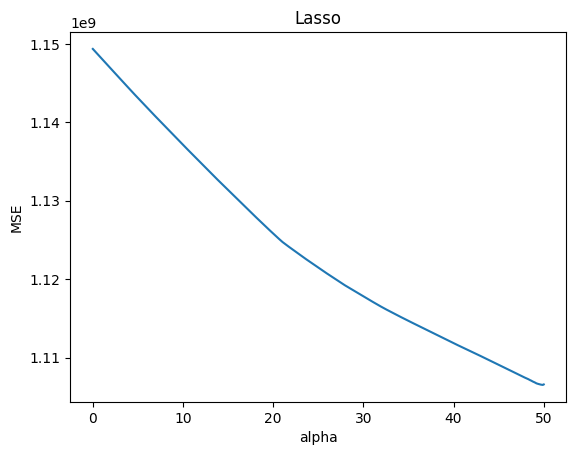

In [28]:
mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)
plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

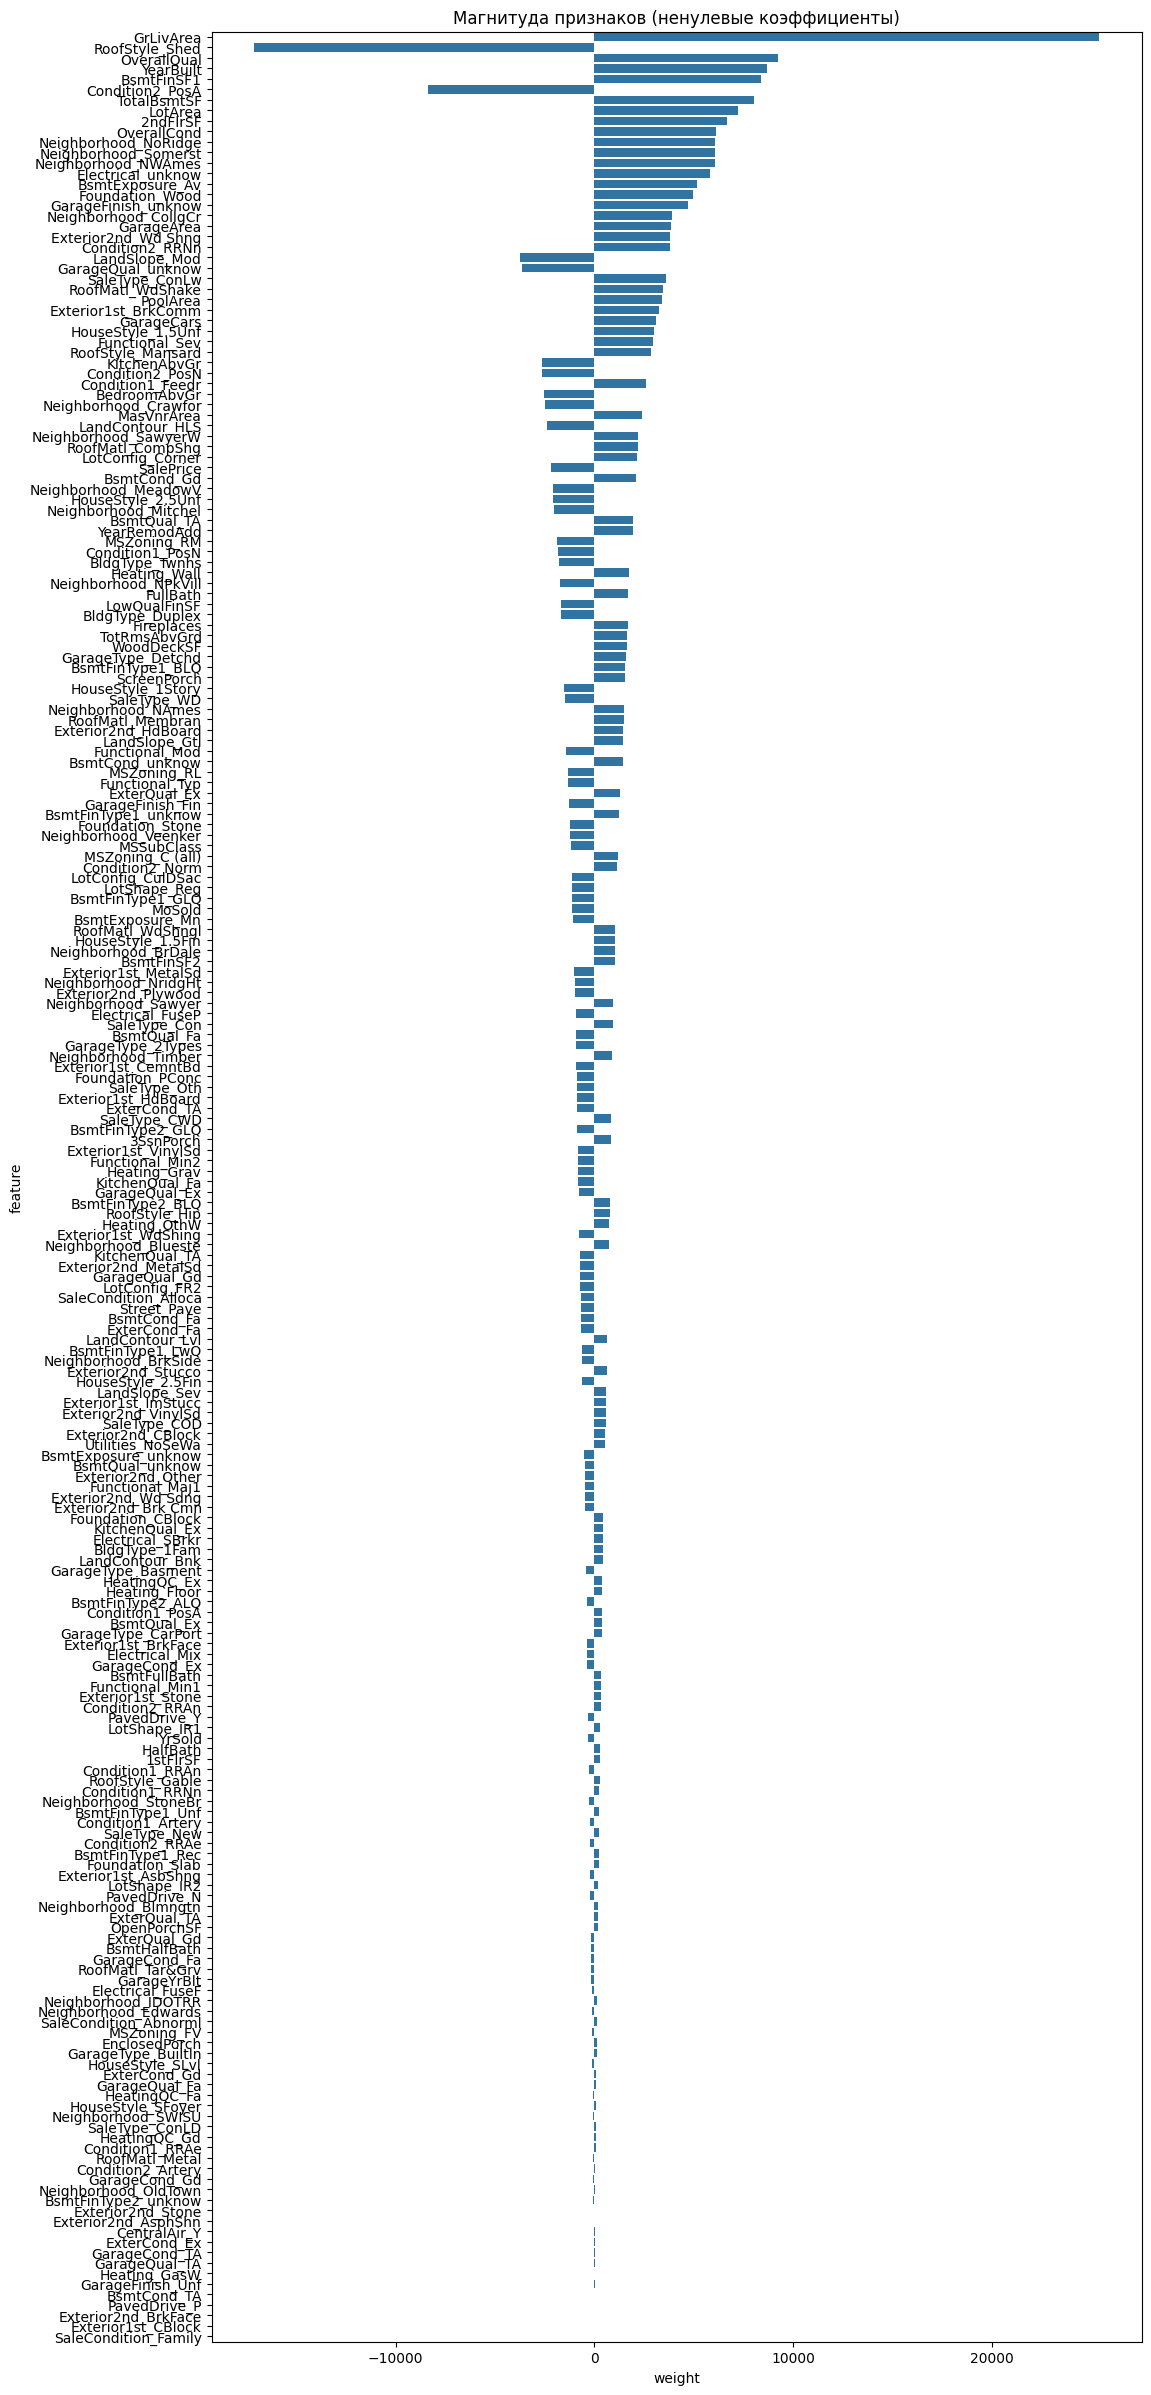

Количество ненулевых признаков: 220


In [32]:
coef = pd.DataFrame(list(zip(np.round(lasso_cv.coef_, 2), df.columns)))
coef.columns = ['weight', 'feature']
non_zero_coef = coef[coef['weight'] != 0]
non_zero_coef = non_zero_coef.reindex(non_zero_coef['weight'].abs().sort_values(ascending=False).index)
#hist
plt.figure(figsize=(12, 30))
sns.barplot(x='weight', y='feature', data=non_zero_coef)
plt.title('Магнитуда признаков (ненулевые коэффициенты)')
plt.show()
num_non_zero = non_zero_coef.shape[0]
print(f"Количество ненулевых признаков: {num_non_zero}")

In [33]:
mse_scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -mse_scores.mean()
print(f"Средняя ошибка предсказания на 5 фолдах (MSE): {mean_mse}")

Средняя ошибка предсказания на 5 фолдах (MSE): 1106575659.6615252


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")

Размерность X_train: (978, 275)
Размерность X_test: (482, 275)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [41]:
lassoCV = LassoCV(alphas=np.linspace(0.001, 50, 500), cv=5, random_state=42)
lassoCV.fit(X_train, y_train)
y_pred = lassoCV.predict(X_test)


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

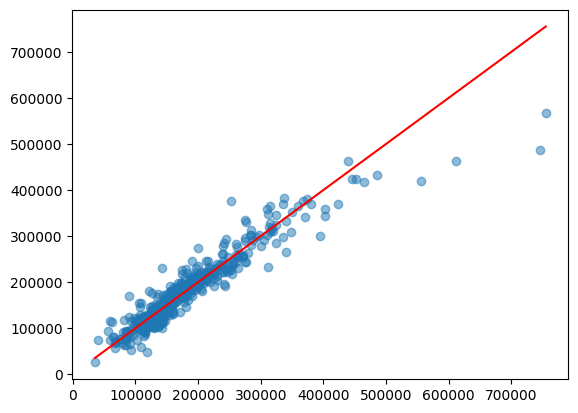

In [42]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [48]:
X = df.drop(['SalePrice'], axis=1)
y = df["SalePrice"]

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
lasso = Lasso(alpha=1)
mse_scores = -cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Средняя ошибка на 5 фолдах (MSE): {mse_scores.mean()}")

Средняя ошибка на 5 фолдах (MSE): 1258326683.709044


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.